# UHECR energy losses

Recreate the figures from De Domenico, M. & Insolia, A., 2012. Influence of cosmological models on the GZK horizon of ultrahigh energy protons. Journal of Physics G: Nuclear and Particle Physics, 40(1), p.015201.

In [20]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from recreate_MD2012 import omega_gzk, Omega_gzk
import seaborn as sns
import h5py

sns.set_context('talk')
sns.set_style('ticks', 
              {'font.family':'serif', 'font.serif':'Times', 'font.scale' : 5})
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 11
plt.rc('text', usetex=True)

In [21]:
output_file = 'data/recreate_MD2012.hdf5'

## Figure 2

Loss length of different processes.

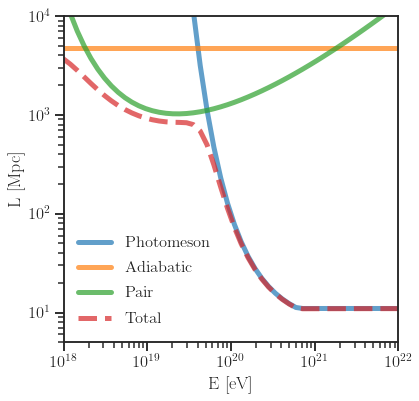

In [22]:
from fancy.propagation.energy_loss import make_energy_loss_plot

z = 0.1
E = np.logspace(np.log(1e18), np.log(1e22), base = np.e)

make_energy_loss_plot(z, E)
plt.savefig('tex/figures/Fig2_MD2012.pdf', dpi = 500, bbox_inches = 'tight')

## Figure 4a

In [16]:
# # calculation
# N = 50
# z = np.linspace(0, 0.1, N)
# Eth = np.linspace(50, 100, 6)

# alpha = 2.7

# Eth_list = []
# for eth in Eth:
#     om_gzk = []
#     for z_prime in z:
#         om_gzk.append(omega_gzk(z_prime, eth, alpha))
#     Eth_list.append(om_gzk) 
#     print (eth, 'completed')    

In [9]:
# # save the data
# with h5py.File(output_file, 'r+') as f:
#     fig4a = f.create_group('Fig4a')
#     fig4a.create_dataset('z', data = z)
#     fig4a.create_dataset('Eth', data = Eth)
#     fig4a.create_dataset('Eth_list', data = Eth_list)

In [24]:
# read in the data
with h5py.File(output_file, 'r') as f:
    fig4a = f['Fig4a']
    Eth_list = fig4a['Eth_list'].value
    Eth = fig4a['Eth'].value
    z = fig4a['z'].value

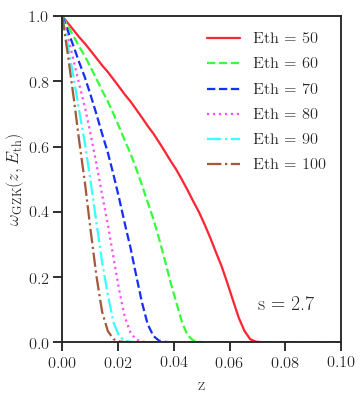

In [25]:
# copy the colour scheme and linestyles in the paper
colors = ['#FD2632', '#35FD3B', '#172FFB', '#FC4FFC', '#38FFFE', '#A35A3B']
linestyles = ['-', '--', '--', ':', '-.', '-.']

# plot
plt.figure( figsize = (5, 6) )
for om_gzk, label, color, ls in zip(Eth_list, Eth, colors, linestyles):
    plt.plot(z, om_gzk, label = 'Eth = ' + str(int(label)), color = color, linestyle = ls)
plt.legend(frameon = False)
plt.xlabel('z')
plt.ylabel('$\omega_\mathrm{GZK}(z, E_\mathrm{th})$')
plt.text(0.07, 0.1, 's = 2.7', fontsize = 20)
plt.xlim(0, 0.1)
plt.ylim(0, 1)
plt.savefig('tex/figures/Fig4a_MD2012.pdf', dpi = 500, bbox_inches = 'tight')

## Figure 4b

In [26]:
# Calculation
# N = 50
# alpha = [2, 2.2, 2.4, 2.7]
# Eth = [50, 100]
# z = np.linspace(0, 0.1, N)

# Eth_list = []
# for e in Eth:
#     alpha_list = []
#     for a in alpha:
#         om_gzk = []
#         for z_prime in z:
#             om_gzk.append(omega_gzk(z_prime, e, a))
#         alpha_list.append(om_gzk)
#         print(a, 'completed')
#     Eth_list.append(alpha_list)
#     print(e, 'completed')

In [27]:
# # save the data
# with h5py.File(output_file, 'r+') as f:
#     fig4b = f.create_group('Fig4b')
#     fig4b.create_dataset('z', data = z)
#     fig4b.create_dataset('Eth', data = Eth)
#     fig4b.create_dataset('alpha', data = alpha)
#     fig4b.create_dataset('Eth_list', data = Eth_list)

In [28]:
# read in the data
with h5py.File(output_file, 'r') as f:
    fig4b = f['Fig4b']
    Eth_list = fig4b['Eth_list'].value
    alpha = fig4b['alpha'].value
    Eth = fig4b['Eth'].value
    z = fig4b['z'].value

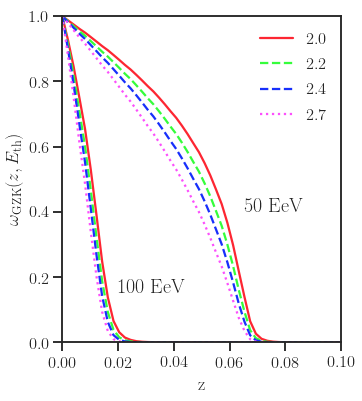

In [29]:
# copy the colour scheme and linestyles from the paper
colors = ['#FD2632', '#35FD3B', '#172FFB', '#FC4FFC']
linestyles = ['-', '--', '--', ':']

# plot
plt.figure(figsize = (5, 6))
first = True
for alpha_list in Eth_list:
    for om_gzk, a, color, ls in zip(alpha_list, alpha, colors, linestyles):
        if first:
            plt.plot(z, om_gzk, label = str(a), color = color, linestyle = ls)
        else:
            plt.plot(z, om_gzk, color = color, linestyle = ls)
    first = False
            
plt.xlim(0, 0.1)
plt.ylim(0, 1)
plt.xlabel('z')
plt.ylabel('$\omega_\mathrm{GZK}(z, E_\mathrm{th})$')
plt.legend(frameon = False)
plt.text(0.02, 0.15, '100 EeV', fontsize = 20)
plt.text(0.065, 0.4, '50 EeV', fontsize = 20)
plt.savefig('tex/figures/Fig4b_MD2012.pdf', dpi = 500, bbox_inches = 'tight')

## Figure 7

In De Domenico, M., 2013. HERMES: Simulating the Propagation of Ultra-High Energy Cosmic Rays. arXiv.org, astro-ph.IM.

In [30]:
# # Calculation
# N = 50
# D = np.linspace(0, 300, N)
# Eth = np.linspace(60, 100, 5)

# alpha = 2.4
# Eth_list = []
# for e in Eth:
#     om_gzk = []
#     for d in D:
#         z = d / DH
#         om_gzk.append(omega_gzk(z, e, alpha))
#     Eth_list.append(om_gzk)
#     print(e, 'completed')

In [31]:
# # save the data
# with h5py.File(output_file, 'r+') as f:
#     fig7 = f.create_group('Fig7')
#     fig7.create_dataset('D', data = D)
#     fig7.create_dataset('Eth', data = Eth)
#     fig7.create_dataset('alpha', data = alpha)
#     fig7.create_dataset('Eth_list', data = Eth_list)

In [32]:
# read in the data
with h5py.File(output_file, 'r') as f:
    fig7 = f['Fig7']
    D = fig7['D'].value
    Eth = fig7['Eth'].value
    alpha = fig7['alpha'].value
    Eth_list = fig7['Eth_list'].value

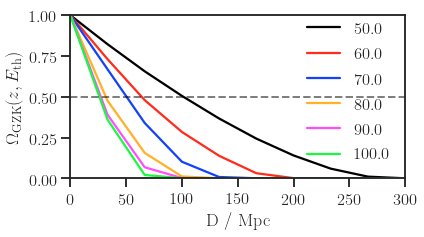

In [33]:
colors = ['k', '#FF2B1B', '#1442FB', '#FFB228', '#FF4FFC', '#1AF842']

plt.figure(figsize = (6, 3))
for Om_gzk, e, color in zip(Eth_list, Eth, colors):
    plt.plot(D, Om_gzk, label = str(e), color = color)
plt.legend(frameon = False)
plt.axhline(0.5, linestyle = '--', lw = 2, color = 'k', alpha = 0.5)
plt.xlim(0, 300)
plt.ylim(0, 1)
plt.xlabel('D / Mpc')
plt.ylabel('$\Omega_\mathrm{GZK}(z, E_\mathrm{th})$')
plt.savefig('tex/figures/Fig7_MD2013.pdf', dpi = 500, bbox_inches = 'tight')